# Linear Regression
## Purpose of this notebook
- It is to accurately predict the box office revenue of the movie based on various available features.

## Specific Objectives
- Build a predictive model that can estimate the expected revenue of movies.
- Provide insights into which features are most influential in determining a movie's box office success.
- Compare linear regression performance with more advanced models like Random Forest and XGBoost.

## Steps
- Import the libraries and load the dataset.
- Preprocessing and Modelling.
    - train-test split.
    - LabelEncoder: this is used to convert categorical variables into numerical format.
    - StandardScaler: this is used to standardize the features by removing the mean and scaling to unit variance.
    - CountVectorizer: this is used to convert text data into numerical format.
    - Metrics: Offers tools to evaluate model accuracy.

## Advanced modelling:
- xgboost: an efficient and scalable implementation of gradient boosting framework.

## Utility
- warnings.filterwarnings('ignore'): Hides unnecessary warning messages for cleaner output.


In [1]:
!pip show xgboost

In [2]:
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl (253.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]


In [3]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

### Note:
- `The warnings.filterwarnings('ignore)` suppresses all warnings messages that would normally be displayed in the console. So the output will be cleaner and easier to read.

In [5]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('boxoffice.csv')

In [6]:
df.shape

(2694, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [8]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [10]:
df.describe().T # T is short for Transpose, which flips the rows and columns

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [12]:
df.drop(columns=['world_revenue', 'opening_revenue'], inplace=True)
df.describe()

,domestic_revenue,opening_theaters,budget,release_days
count,2.694000e+03,2694.000000,2.694000e+03,2694.000000
mean,1.508539e+08,2263.039347,1.537996e+08,90.897550
std,8.579997e+07,1298.559140,8.557624e+07,50.894041
min,8.277650e+05,10.000000,5.197977e+06,1.000000
25%,7.673272e+07,1161.000000,7.861876e+07,47.000000
50%,1.525725e+08,2271.500000,1.562567e+08,91.000000
75%,2.247314e+08,3392.250000,2.274832e+08,135.000000
max,2.998107e+08,4499.000000,2.998597e+08,179.000000


In [15]:
df.isnull().sum()*100 / df.shape[0]

title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [16]:
print(df.to_string)

<bound method DataFrame.to_string of               title  domestic_revenue  ...     genres  release_days
0      The Avengers           6026491  ...  Animation            16
1           Titanic         169411543  ...     Action           103
2     Jurassic Park         107836098  ...     Horror            89
3            Avatar          51433697  ...     Horror            85
4     The Lion King         142791649  ...     Comedy           158
...             ...               ...  ...        ...           ...
2689          X-Men          38153242  ...     Comedy            92
2690     The Matrix          63305093  ...     Comedy           156
2691   Forrest Gump         271758510  ...      Drama           146
2692           Jaws         268259149  ...   Thriller           170
2693   Interstellar         158336835  ...     Comedy           170

[2694 rows x 8 columns]>


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   distributor       2694 non-null   object
 3   opening_theaters  2694 non-null   int64 
 4   budget            2694 non-null   int64 
 5   MPAA              2694 non-null   object
 6   genres            2694 non-null   object
 7   release_days      2694 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 168.5+ KB


In [18]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '') 
    temp = (~df[col].isnull()) 
    df[temp][col] = df[temp][col].convert_dtypes(float) 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
print(df.to_string)

<bound method DataFrame.to_string of               title  domestic_revenue  ...     genres  release_days
0      The Avengers             26491  ...  Animation            16
1           Titanic          69411543  ...     Action           103
2     Jurassic Park           7836098  ...     Horror            89
3            Avatar           1433697  ...     Horror            85
4     The Lion King          42791649  ...     Comedy           158
...             ...               ...  ...        ...           ...
2689          X-Men           8153242  ...     Comedy            92
2690     The Matrix           3305093  ...     Comedy           156
2691   Forrest Gump          71758510  ...      Drama           146
2692           Jaws          68259149  ...   Thriller           170
2693   Interstellar          58336835  ...     Comedy           170

[2694 rows x 8 columns]>


NameError: name 'plt' is not defined

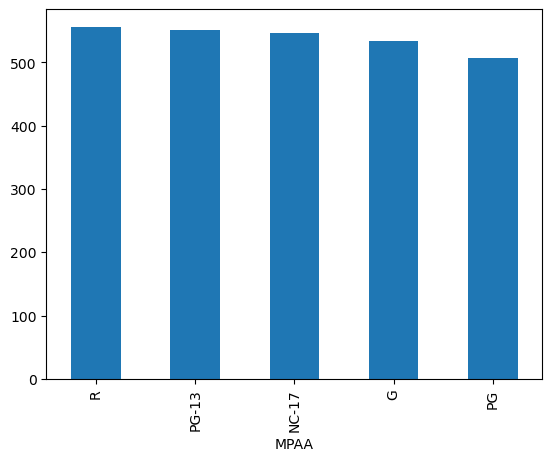

In [21]:

df["MPAA"].value_counts().plot(kind='bar')

plt.title('Bar Chart of MPAA')

plt.xlabel('Category')

plt.ylabel('Count')

plt.show()

In [ ]:
# Average domestic revenue by MPAA rating
# subplots